# Аналитика в авиакомпании

Проведена подготовка данных средствами SQL. Основываясь на результатах, представить визуализацию данных (построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов).

Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

### План

1. Построение визуализации
  - импорт данных, их изучение и проверка
  - построение графиков:
      - модели самолетов и количество рейсов
      - города и количество рейсов
      - топ-10 городов и количество рейсов
  - выводы
  
  
2. Проверка гипотезы о среднем спросе на билеты


3. Общие выводы

### Описание данных

__flights_amount_per_model__ - содержит информацию о рейсах по моделям самолетов
 - _model_ — модели самолета
 - _flights_amount_ — количество рейсов для каждой модели самолетов model в сентябре 2018 года
 
 ##### Путь к файлу:
- /datasets/query_1.csv

__average_flights_per_city__ - среднее количество рейсов, прибывающих в город в день (данные за сентябрь 2018 года)
 - _city_ — город
 - _average_flights_ — среднее количество рейсов, прибывающих в город за день в сентябре 2018 года
  
 ##### Путь к файлу:
- /datasets/query_3.csv

__tickets_per_week__ - количество билетов, приобретенных на рейсы в Москву по неделям в сентябре 2018 года
 - _week_number_ — номер недели
 - _ticket_amount_ — количество проданных билетов за неделю
 - _festival_week_ — есть ли на этой неделе фестиваль
 - _festival_name_ — название фестиваля
  
 ##### Путь к файлу:
- /datasets/query_last.csv

## 1. Построение визуализации

### Импорт данных, их изучение и проверка

In [1]:
# импортируем библиотеки
import pandas as pd               # pandas
import numpy as np                # numpy
import matplotlib.pyplot as plt   # matplotlib 

import seaborn as sns             # seaborn
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # стиль графиков в отчете

import scipy.stats

In [2]:
# импортируем файлы

# рейсы для каждой модели самолета
flights_amount_per_model = pd.read_csv('/datasets/query_1.csv') 

# среднее количество рейсов, прибывающих в город в день в сентябре 2018 года
average_flights_per_city = pd.read_csv('/datasets/query_3.csv') 

In [3]:
# функция отрисовки диаграммы
    # data - датасет
    # figsize - размер графика
    # xlabel - подпись оси X
    # ylabel - подпись оси Y
    # title - заголовок графика
    
def draw_barplot(data, figsize, xlabel, ylabel, title):

    # задаем фигуру
    f, ax = plt.subplots(figsize=figsize)

    # отрисовываем график
    sns.barplot(x=data.columns[1], 
                y=data.columns[0], 
                data=data)

    # добавляем подписи осей и заголовок
    ax.set(ylabel=ylabel,
           xlabel=xlabel,
           title = title)
    sns.despine(left=True, bottom=True);

##### Информация о рейсах по моделям самолетов

In [4]:
flights_amount_per_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
flights_amount_per_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Данные получены без пропусков, типы данных соответствуют хранящимся данным.

Построим график оказывающий распределение рейсов по моделям самолетов.

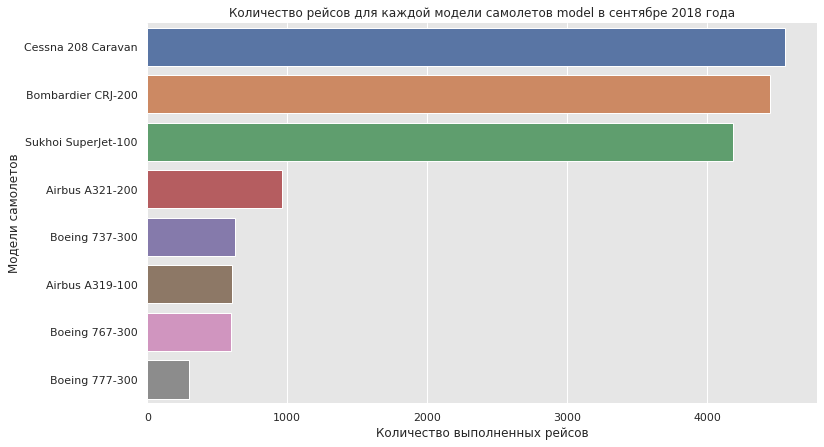

In [6]:
draw_barplot(flights_amount_per_model.sort_values('flights_amount', ascending=False), 
             (12, 7), 
             'Количество выполненных рейсов',
             'Модели самолетов',
             'Количество рейсов для каждой модели самолетов model в сентябре 2018 года')

Более 4 тысяч рейсов совершили самолеты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Места распределены соответственно.

Наименьшее количество рейсов совершил Boeing 777-300 (300). Примерно одинаковое количество рейсов совершили Airbus A319-100	(607),  Boeing 737-300 (630) и Boeing 767-300 (600). 
960 рейсов совершил Airbus A321-200. 

##### Среднее количество рейсов, прибывающих в город в день (данные за сентябрь 2018 года)

In [7]:
average_flights_per_city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [8]:
average_flights_per_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
# округляем среднее количество прилетов до 2х знаков для удобства чтения
average_flights_per_city['average_flights'] = average_flights_per_city['average_flights'].round(2)

Данные без пропусков, типы данных соответсвуют хранящимся данным. Для удобства чтения и работы числа были округлены до сотых.

Построим график оказывающий распределение среднего количества рейсов по городам за сентябрь 2018 года.

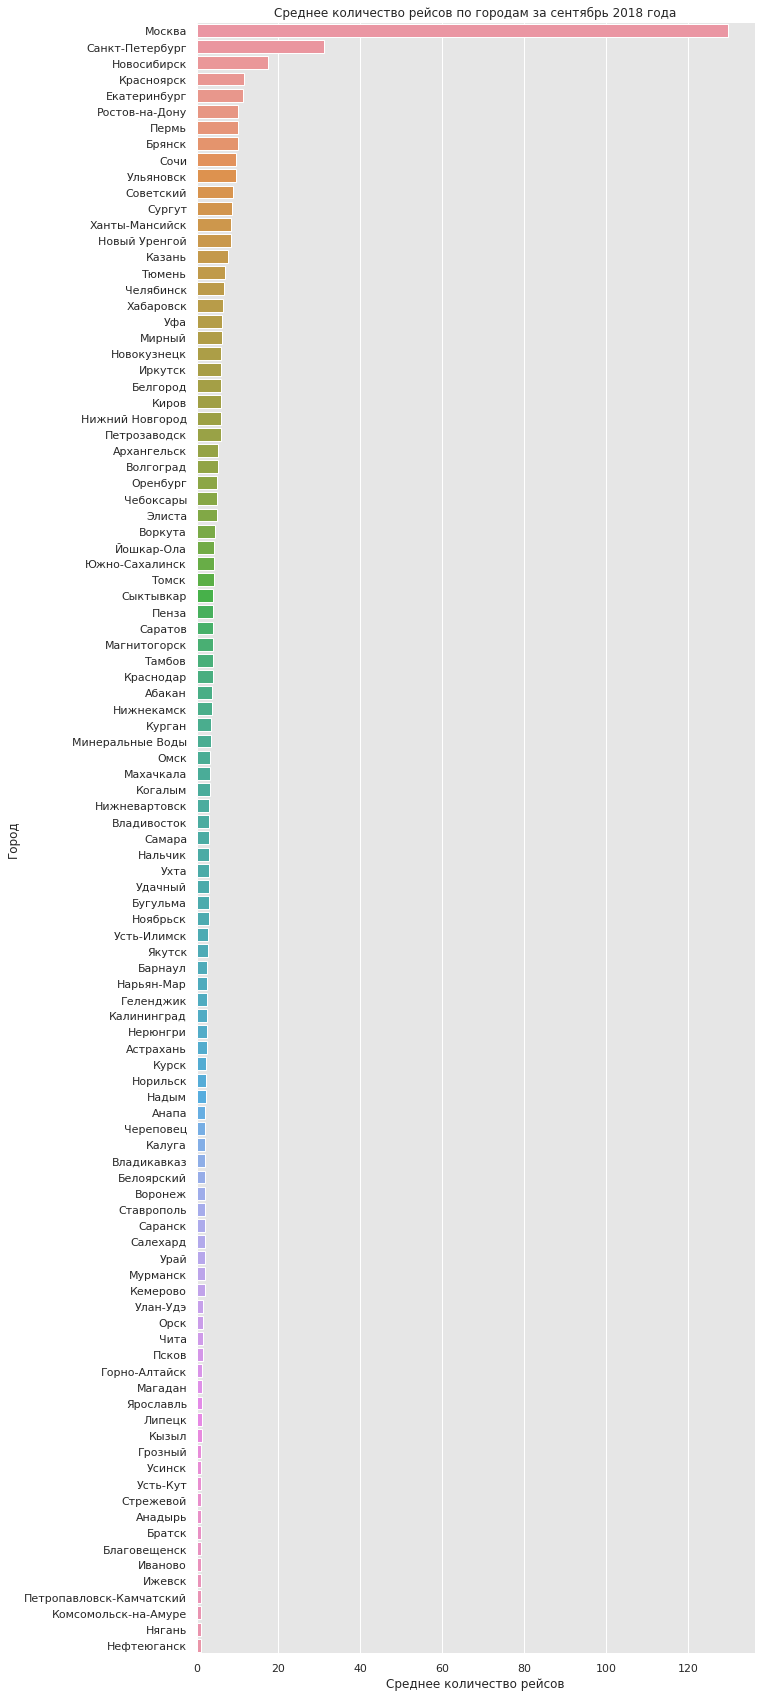

In [10]:
draw_barplot(average_flights_per_city.sort_values('average_flights', ascending=False),
             (10, 30), 
             'Среднее количество рейсов', 
             'Город',
             'Среднее количество рейсов по городам за сентябрь 2018 года')

Москва - лидер по среднему количеству рейсов в день (больше 120). Далее с большим отставанием идет Петербург (в среднем 31 рейс в день), после Новосибирск - около 17 рейсов в день.

Меньше всего в среднем летают в Нефтеюганск, Нягань, Комсомольск-на-Амуре, Петропавловск-Камчатский, Ижевск и другие.

##### Топ-10 городов по среднему количеству рейсов, прибывающих в город в день (данные за сентябрь 2018 года)

In [11]:
# формируем топ-10 городов по прибывающим рейсам
top10_cities_avg_flights = average_flights_per_city.sort_values('average_flights', ascending=False).head(10)

In [12]:
# выводим топ-10
top10_cities_avg_flights

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Построим график оказывающий распределение среднего количества рейсов по городам за сентябрь 2018 года (выборка из топ-10 городов).

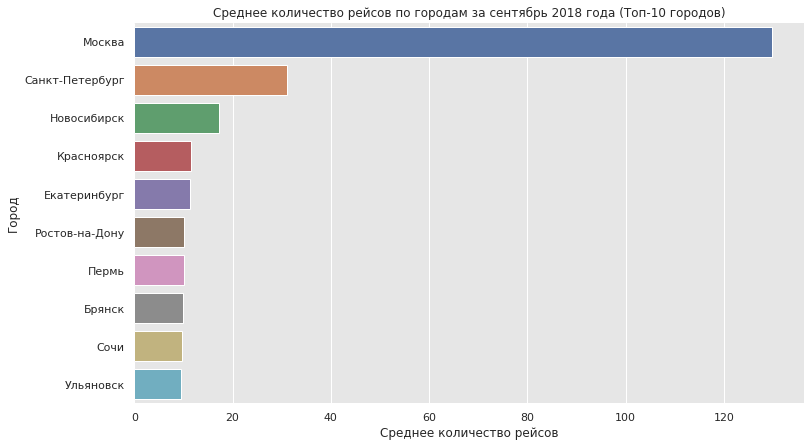

In [13]:
draw_barplot(top10_cities_avg_flights,
             (12, 7), 
             'Среднее количество рейсов', 
             'Город',
             'Среднее количество рейсов по городам за сентябрь 2018 года (Топ-10 городов)')

Из топ-10 городов наименьшее количество рейсов совершается в Ульяновск, затем с небольшим отрывом Сочи, Брянск и Пермь.

### Выводы

Полученные данные не имеют пропусков, типы данных соответствуют зранящимся данным. Для удобства чтения, в таблице со средним количеством рейсов по городам за сентябрь 2018 года, данные были округлеы до сотых с помощью метода _.round()_

Были построены графики модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

Более 4 тысяч рейсов совершили самолеты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Места распределены соответственно.
Наименьшее количество рейсов совершил Boeing 777-300 (300). Примерно одинаковое количество рейсов совершили Airbus A319-100	(607),  Boeing 737-300 (630) и Boeing 767-300 (600). 
960 рейсов совершил Airbus A321-200. 

Москва - лидер по среднему количеству рейсов в день (больше 120). Далее с большим отставанием идет Петербург (в среднем 31 рейс в день), после Новосибирск - около 17 рейсов в день.
Меньше всего в среднем летают в Нефтеюганск, Нягань, Комсомольск-на-Амуре, Петропавловск-Камчатский, Ижевск и другие.

Из топ-10 городов наименьшее количество рейсов совершается в Ульяновск, затем с небольшим отрывом Сочи, Брянск и Пермь.

## 2. Проверка гипотезы о среднем спросе на билеты

In [14]:
# импортируем файл с данными о количестве билетов, приобретенных на рейсы в Москву по неделям в сентябре 2018 года
tickets_per_week = pd.read_csv('/datasets/query_last.csv')

In [15]:
# находим среднее

# для недель с фестивалями
avg_week_with_festival = tickets_per_week.query('~festival_name.isnull()')['ticket_amount']

# для недель без фестивалей
avg_week_no_festival = tickets_per_week.query('festival_name.isnull()')['ticket_amount']

In [16]:
print('Средний спрос на билеты во время фестивалей', np.mean(avg_week_with_festival))
print('Доверительный интервал:', scipy.stats.t.interval(0.95, len(avg_week_with_festival)-1, 
                                                        loc=np.mean(avg_week_with_festival),
                                                        scale=scipy.stats.sem(avg_week_with_festival)))
print()
print('Средний спрос на билеты в обычное время', np.mean(avg_week_no_festival))
print('Доверительный интервал:', scipy.stats.t.interval(0.95, len(avg_week_no_festival)-1, 
                                                        loc=np.mean(avg_week_no_festival),
                                                        scale=scipy.stats.sem(avg_week_no_festival)))

Средний спрос на билеты во время фестивалей 48662.666666666664
Доверительный интервал: (37693.65924921319, 59631.67408412014)

Средний спрос на билеты в обычное время 51530.857142857145
Доверительный интервал: (51409.764223837876, 51651.950061876414)


Формулируем 2 гипотезы:
- нулевая гипотеза (Н0) - _cредний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время_
- альтернативная гипотеза (Н1) - _cредний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время_

Проведем проверку гипотез с помощью Т-теста.

Имеем две генеральные совокупности, поэтому используем метод ___scipy.stats.ttest_ind()___.

In [17]:
# устанавливаем значение уровня статистической значимости
alpha = .05 

results = scipy.stats.ttest_ind(avg_week_with_festival,
                                avg_week_no_festival,
                                equal_var=False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений:', end = ' ')
    print('cредний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время')
    
else:
    print('Отвергнуть гипотезу Н0 не получилось:', end = ' ')
    print('cредний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время')

p-значение:  0.377432493172683
Отвергнуть гипотезу Н0 не получилось: cредний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время


Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

### Вывод

При помощи Т-теста для двух генеральных совокупностей было проверено утверждение: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Сформулированы 2 гипотезы:
- нулевая гипотеза (Н0) - _средний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время_
- альтернативная гипотеза (Н1) - _средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время_

В ходе теста отвергнуть нулевую гипотезу не удалось: __средний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время__.

## 3. Общие выводы

Полученные данные не имеют пропусков, типы данных соответствуют зранящимся данным. Для удобства чтения, в таблице со средним количеством рейсов по городам за сентябрь 2018 года, данные были округлеы до сотых с помощью метода _.round()_

Были построены графики модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

Более 4 тысяч рейсов совершили самолеты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Места распределены соответственно.
Наименьшее количество рейсов совершил Boeing 777-300 (300). Примерно одинаковое количество рейсов совершили Airbus A319-100	(607),  Boeing 737-300 (630) и Boeing 767-300 (600). 
960 рейсов совершил Airbus A321-200. 

Москва - лидер по среднему количеству рейсов в день (больше 120). Далее с большим отставанием идет Петербург (в среднем 31 рейс в день), после Новосибирск - около 17 рейсов в день.
Меньше всего в среднем летают в Нефтеюганск, Нягань, Комсомольск-на-Амуре, Петропавловск-Камчатский, Ижевск и другие.

Из топ-10 городов наименьшее количество рейсов совершается в Ульяновск, затем с небольшим отрывом Сочи, Брянск и Пермь.

При помощи Т-теста для двух генеральных совокупностей было проверено утверждение: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Сформулированы 2 гипотезы:
- нулевая гипотеза (Н0) - _средний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время_
- альтернативная гипотеза (Н1) - _средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время_

В ходе теста отвергнуть нулевую гипотезу не удалось: __средний спрос на билеты во время фестивалей значимо не отличается от среднего спроса на билеты в обычное время__.